Business Case Study: Aerofit - Descriptive Statistics & Probability

*   **Author:** Debojit Gogoi.
*   **EMail:** debojitgogoi.blr@gmail.com
*   **Dataset:** Limited access
*   **Business problem definition:** The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.
*   **Declaration:** This dataset does not belong to the author. The author only wants to use the dataset and create insights using opensource tools. The aim of this experiment is learning and no other business motives are addressed.

# Table of contents

1.   Introduction
2.   Dataset preparation
1.   Exploratory analysis
2.   Univarite analysis
1.   Bivariate analysis
2.   Correlation between variables
1.   Computing probability
2.   Customer profiling
1.   Recommendations

# Introduction:

**About:**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business problem:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

**Expectations:**

*   Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
*   For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

# Dataset Preparation

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.
The dataset has the following features:

*   **Dataset link:** Aerofit_treadmill.csv
*   **Product Portfolio:**
  *   The KP281 is an entry-level treadmill that sells for $1,500.
  
  *   The KP481 is for mid-level runners that sell for $1,750.
  
  *   The KP781 treadmill is having advanced features that sell for $2,500.

**Table Structure:**

Age:	In years.

Gender:	Male/Female.

Education:	In years.

MaritalStatus:	Single or partnered.

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week.




  
  



**Step 1: Data loading, understanding and cleanup for exploration**

Load the Aerofit dataset.

Understand the structure of the dataset, including column names and data types.

Check for missing values and handle them appropriately.

List item

In [272]:
# import the required libraries for our exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import scipy.stats as stats

In [273]:
# import the dataset
!wget "aerofit_treadmill.csv" -O aerofit.csv

--2024-04-19 13:35:51--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.176, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-04-19 13:35:52 (3.33 GB/s) - ‘aerofit.csv’ saved [7279/7279]



In [274]:
# load the dataset to a variable
df = pd.read_csv("aerofit.csv")

In [275]:
# get the details of the dataframe
print(df.shape)
print(df.info())

(180, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


**Observations:**

The dataframe has 180 rows and 9 columns.

The columns are non null with integet type and object type datatypes.


In [276]:
# display the first few rows of the dataframe
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [277]:
# display the last few rows of the dataframe
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [278]:
# check dataframe statistics
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observations:**



1.   **Age (in Years):** The median age is 26 years with minimum 18 years and maximum 50 years.
2.   **Education (in Years):** The median education experience is 16 years with minimum of 12 years and maximum 21 years.
1.   **Usage (1-7 days/week):** The median usage per week is 3 days per week with minimof 2 days of usage per week and maximum of 7 days per week.
2.   **Fitness (1-5, low to high likert scale):** The median fitness score of the customers is 3, which is moderate fitness, and minimum is 3 as well with maximum as 5. This indicates that the customers are moderately fit.a
1.   **Income (in USD):** The median income is USD 50K, with minimum USD 30K and maximum income of more than USD 100K.
2.   **Miles (distance):** The median distance covered by customers either by walking or running is 94 miles, with minimum distance covered as 21 miles and maximum distance covered is 360 miles.







In [279]:
# check if the dataset has null values
# check if the dataset has duplicate valeus
print(df.isnull().sum())
print(df.duplicated().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64
0


**Observation:**

It is observed that the dataset does not have NULL values.

It is observed that the dataset does not have duplicate values.

In [280]:
# check for unique values in the dataframe
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [281]:
# list down the unique items in the dataframe
for items in df.columns:
  print(f"The number of unique \033[1m{items}\033[0m items in the dataframe are \033[1m{df[items].nunique()}\033[0m.")
  print(f"The unique items are are {df[items].unique()}.")
  print("\n")

The number of unique Product items in the dataframe are 3.
The unique items are are ['KP281' 'KP481' 'KP781'].


The number of unique Age items in the dataframe are 32.
The unique items are are [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42].


The number of unique Gender items in the dataframe are 2.
The unique items are are ['Male' 'Female'].


The number of unique Education items in the dataframe are 8.
The unique items are are [14 15 12 13 16 18 20 21].


The number of unique MaritalStatus items in the dataframe are 2.
The unique items are are ['Single' 'Partnered'].


The number of unique Usage items in the dataframe are 6.
The unique items are are [3 2 4 5 6 7].


The number of unique Fitness items in the dataframe are 5.
The unique items are are [4 3 2 1 5].


The number of unique Income items in the dataframe are 62.
The unique items are are [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  

In [282]:
# change the datatype for some items in the dataframe.
df['Usage'] = df['Usage'].astype("object")
df['Fitness'] = df['Fitness'].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


In [283]:
# do a quick top statistical analysis
df.describe(include=object)

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,KP281,Male,Partnered,3,3
freq,80,104,107,69,97


**Observations:**


*   The product that has the highest sales is KP281.
*   The gender that uses more Aerofit product is Male.
*   The marital status of major Aerofit users is Partnered/married.
*   They are mostly moderately fit and use the product at least 3 times per week.





**More data cleanup:**

Clean up data even more for easier analysis. Start by creating bins for Age, Education, Income and Miles for better visualization.

**Age:** range (18 and above). Divide age into 4 categories:
Young Adult (18 to 24), Adult (25 to 35), Middle Aged (36 to 45), Elder (46 and above)

**Education:** Divide education in 3 categories: Primary (0 to 12), Secondary (12 to 15), Higher (16 and above)

**Income:** Divide income in 4 categories: Low (0 to 40K), Moderate (40K to 60K), High (60 to 80K), Very High (above 80K)

**Miles:** Divide miles into 4 categories of activity: Light (0 to 50), Moderate (51 to 100), Active (101 to 200), Professional (above 200)

In [284]:
# bin the age values into categories
bin_age_range = [17, 25, 35, 45, float('inf')]
bin_age_labels = ['Young Adult', 'Adult', 'Middle Aged', 'Elder']

df['Age_Range'] = pd.cut(df['Age'], bins=bin_age_range, labels=bin_age_labels)

# bin the education values into categories
bin_education_range = [0, 12, 15, float('inf')]
bin_education_labels = ['Primary', 'Secondary', 'Higher']

df['Edu_Range'] = pd.cut(df['Education'], bins=bin_education_range, labels=bin_education_labels)

# bin the income values into categories
bin_income_range = [0,40000, 60000, 80000, float('inf')]
bin_income_labels = ['Low','Moderate','High','Very High']

df['Income_Range'] = pd.cut(df['Income'], bins=bin_income_range, labels=bin_income_labels)

# bin the miles values into categories
bin_miles_range = [0, 50, 100, 200, float('inf')]
bin_miles_labels = ['Light', 'Moderate', 'Active', 'Professional']

df['Activity_Range'] = pd.cut(df['Miles'], bins=bin_miles_range, labels=bin_miles_labels)

In [285]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Range,Edu_Range,Income_Range,Activity_Range
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adult,Secondary,Low,Active
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adult,Secondary,Low,Moderate
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adult,Secondary,Low,Moderate
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adult,Primary,Low,Moderate
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adult,Secondary,Low,Light


# Outlier detection

**Identify Numerical Features:**

First, identify the numerical features in the dataset for which you want to detect outliers. These features are typically continuous variables like age, education, usage, income, fitness, and miles.

**Visualize Outliers:**

Visualize the distribution of each numerical feature using boxplots. Boxplots are effective for identifying outliers because they display the median, quartiles, and potential outliers.


In [286]:
# identify numerical features
numerical_features = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# iterate over numerical features to calculate IQR and identify outliers
outliers = []
for feature in numerical_features:
    # calculate IQR for the current feature, change dtype to float first to avoid calculation errors
    df[feature] = df[feature].astype(float)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # define outliers for the current feature
    feature_outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))

    # append the indices of outliers for the current feature to the list
    outliers.extend(feature_outliers[feature_outliers].index.tolist())

# remove duplicate indices and sort
outliers = sorted(list(set(outliers)))

# show rows with outliers
print(df.loc[outliers])

    Product   Age  Gender  Education MaritalStatus  Usage  Fitness    Income  \
14    KP281  23.0    Male       16.0     Partnered    3.0      1.0   38658.0   
23    KP281  24.0  Female       16.0     Partnered    5.0      5.0   44343.0   
78    KP281  47.0    Male       16.0     Partnered    4.0      3.0   56850.0   
79    KP281  50.0  Female       16.0     Partnered    3.0      3.0   64809.0   
84    KP481  21.0  Female       14.0     Partnered    5.0      4.0   34110.0   
117   KP481  31.0  Female       18.0        Single    2.0      1.0   65220.0   
139   KP481  48.0    Male       16.0     Partnered    2.0      3.0   57987.0   
142   KP781  22.0    Male       18.0        Single    4.0      5.0   48556.0   
148   KP781  24.0  Female       16.0        Single    5.0      5.0   52291.0   
152   KP781  25.0  Female       18.0     Partnered    5.0      5.0   61006.0   
154   KP781  25.0    Male       18.0     Partnered    6.0      4.0   70966.0   
155   KP781  25.0    Male       18.0    

In [287]:
# outlier percentages
for feature in numerical_features:
    # Calculate the IQR for the variable
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    percentile_95 = np.percentile(df[feature], 95)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Find the outliers for the variable
    outliers = df[(df[feature] < lower_threshold) | (df[feature] > upper_threshold)]

    # Calculate the percentage of outliers
    outlier_percentage = round(len(outliers) / len(df[feature]) * 100, 2 )

    # Output the percentage of outliers
    print(f"IQR for {feature}: {IQR}")
    print(f"Outlier above this Q3 {feature} : {upper_threshold}")
    print(f"Percentage of outliers for {feature}: {outlier_percentage}% \n")

IQR for Age: 9.0
Outlier above this Q3 Age : 46.5
Percentage of outliers for Age: 2.78% 

IQR for Education: 2.0
Outlier above this Q3 Education : 19.0
Percentage of outliers for Education: 2.22% 

IQR for Usage: 1.0
Outlier above this Q3 Usage : 5.5
Percentage of outliers for Usage: 5.0% 

IQR for Fitness: 1.0
Outlier above this Q3 Fitness : 5.5
Percentage of outliers for Fitness: 1.11% 

IQR for Income: 14609.25
Outlier above this Q3 Income : 80581.875
Percentage of outliers for Income: 10.56% 

IQR for Miles: 48.75
Outlier above this Q3 Miles : 187.875
Percentage of outliers for Miles: 7.22% 



Text(0, 0.5, 'Distance')

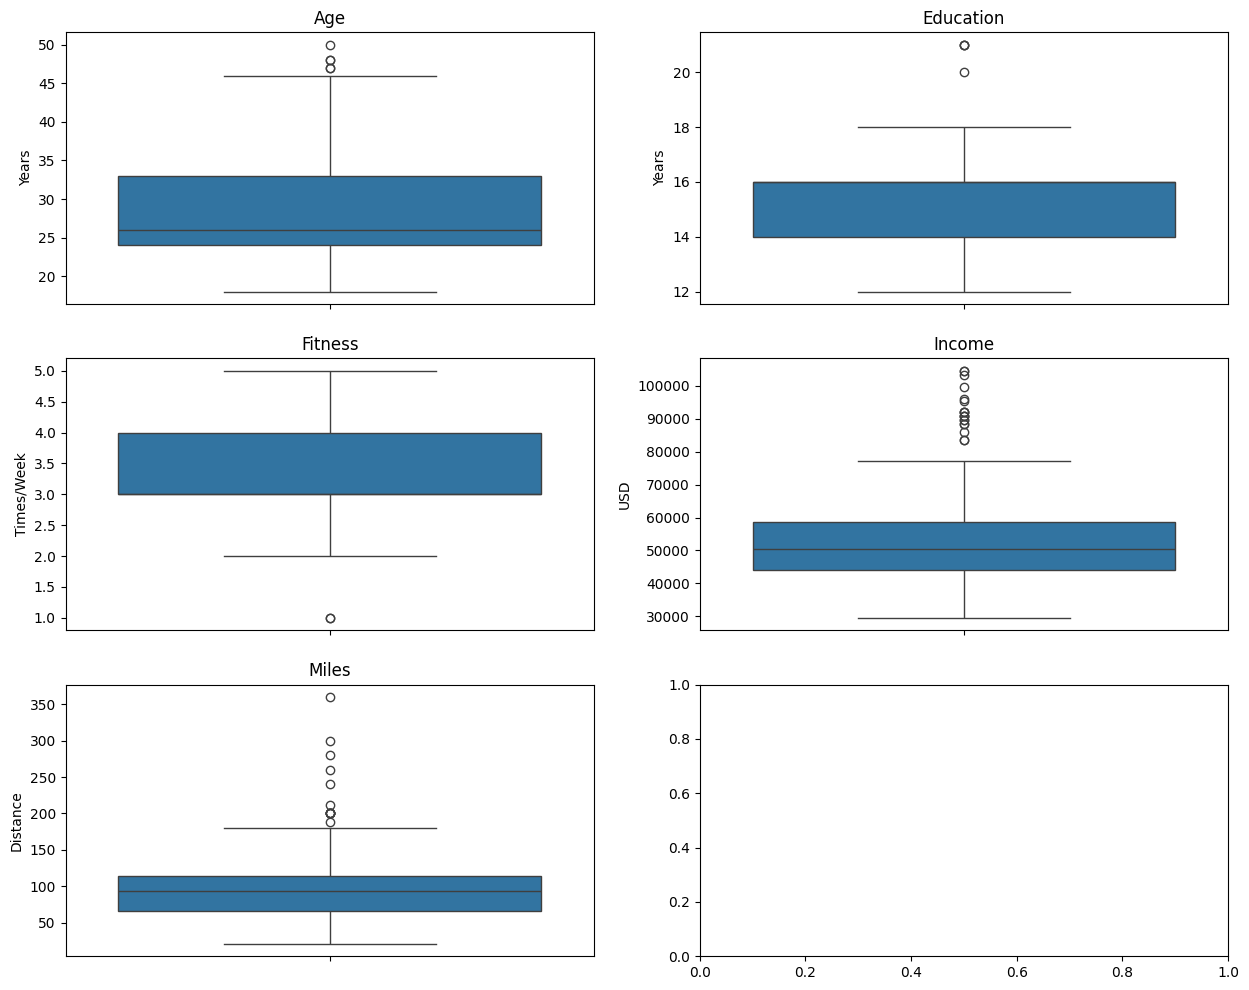

In [288]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
# boxplot age
sns.boxplot(df['Age'], ax=axes[0][0])
axes[0][0].set_title('Age')
axes[0][0].set_ylabel('Years')
# boxplot education
sns.boxplot(df['Education'], ax=axes[0][1])
axes[0][1].set_title('Education')
axes[0][1].set_ylabel('Years')
# boxplot fitness
sns.boxplot(df['Fitness'], ax=axes[1][0])
axes[1][0].set_title('Fitness')
axes[1][0].set_ylabel('Times/Week')
# boxplot income
sns.boxplot(df['Income'], ax=axes[1][1])
axes[1][1].set_title('Income')
axes[1][1].set_ylabel('USD')
# boxplot miles
sns.boxplot(df['Miles'], ax=axes[2][0])
axes[2][0].set_title('Miles')
axes[2][0].set_ylabel('Distance')


**Observation:**

From the above boxplots its observed that income and miles have the highest number of outliers. This provides us the general sense. Lets start diving into details

# Exploratory Data Analysis

# Univariate Analysis

**Product Vs Sales**

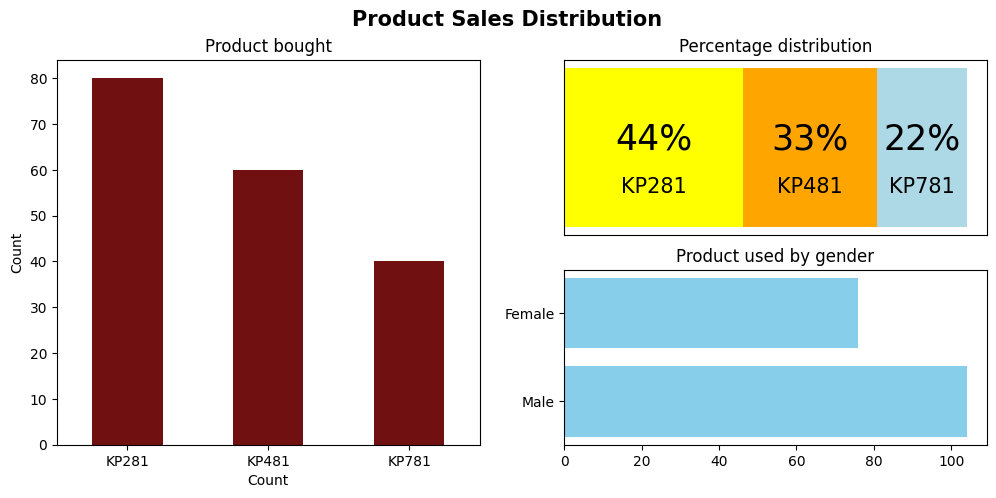

In [289]:
# get product count and distribution
fig = plt.figure(figsize = (12,5))
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[:, 0])
# barplot product count
count_product = df['Product'].value_counts()
sns.barplot(count_product, color ='maroon', width = 0.5, ax=ax1)
ax1.set_title('Product bought')
ax1.set_ylabel('Count')

# barhplot percentage distribution
ax2 = fig.add_subplot(gs[0, 1])
count_product['percent'] = ((count_product.values/df.shape[0])* 100).round()
ax2.barh(count_product.index[0], count_product.loc['percent'][0], left=None, color='yellow')
ax2.barh(count_product.index[0], count_product.loc['percent'][1], left=count_product.loc['percent'][0], color='orange')
ax2.barh(count_product.index[0], count_product.loc['percent'][2], left=count_product.loc['percent'][0]+count_product.loc['percent'][1], color='lightblue')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
count_product['info_percent'] =[count_product['percent'][0]/2,count_product['percent'][0] + count_product['percent'][1]/2,
                                 count_product['percent'][0] + count_product['percent'][1] + count_product['percent'][2]/2]
for i in range(3):
    ax2.text(count_product['info_percent'][i],0.04,f"{count_product['percent'][i]:.0f}%",
             va = 'center', ha='center',fontsize=25, fontweight='light',color='black')

    ax2.text(count_product['info_percent'][i],-0.2,count_product.index[i],
             va = 'center', ha='center',fontsize=15, fontweight='light',color='black')
ax2.set_title('Percentage distribution')

# barhplot gender distribution
ax3 = fig.add_subplot(gs[1, 1])
count_gender = df['Gender'].value_counts()
plt.barh(count_gender.index, count_gender.values, color='skyblue')
ax3.set_title('Product used by gender')
ax1.set_xlabel('Count')

fig.suptitle('Product Sales Distribution',fontproperties = {'size':15,'weight':'bold'})

plt.show()

**Observation:**


*   Its observed that product KP281 has the highest number of sales.
*   It is also observed that males use more Aerofit products than females.




**Fitness Vs Usage**

Text(0.5, 0, 'Fitness scale')

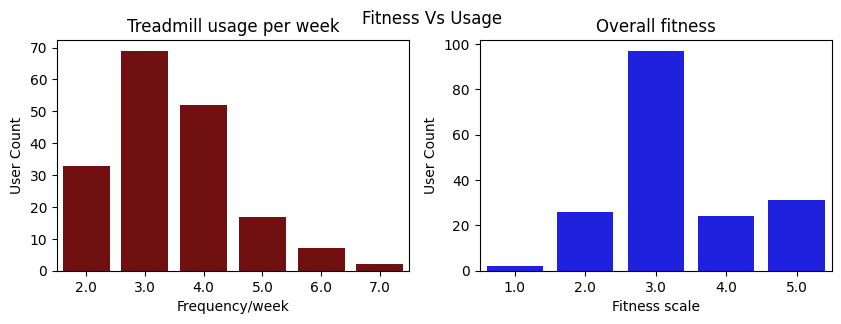

In [290]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Fitness Vs Usage')

# barplot usage per week
usage = df['Usage'].value_counts()
sns.barplot(ax=axes[0], x=usage.index, y=usage.values, color='maroon')
axes[0].set_title("Treadmill usage per week")
axes[0].set_ylabel("User Count")
axes[0].set_xlabel('Frequency/week')

# barplot fitness
fitness = df['Fitness'].value_counts()
sns.barplot(ax=axes[1], x=fitness.index, y=fitness.values, color='blue')
axes[1].set_title("Overall fitness")
axes[1].set_ylabel("User Count")
axes[1].set_xlabel('Fitness scale')

**Observations:**


*   People who are moderately fit and rate themselves on a scale of 3 out of 5 are mostly expected to use the treadmill 2 to 3 times a week.
*   High rated individuals or Fitness enthutiasts would be using the treadmill at 5 to 7 times a week.
*   People who have rated themselves as low in activity would need the treadmill at about 2 to 3 times a week.


**Product Vs Age**

<ipython-input-291-9e56ea7e342f>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(age_range.index)


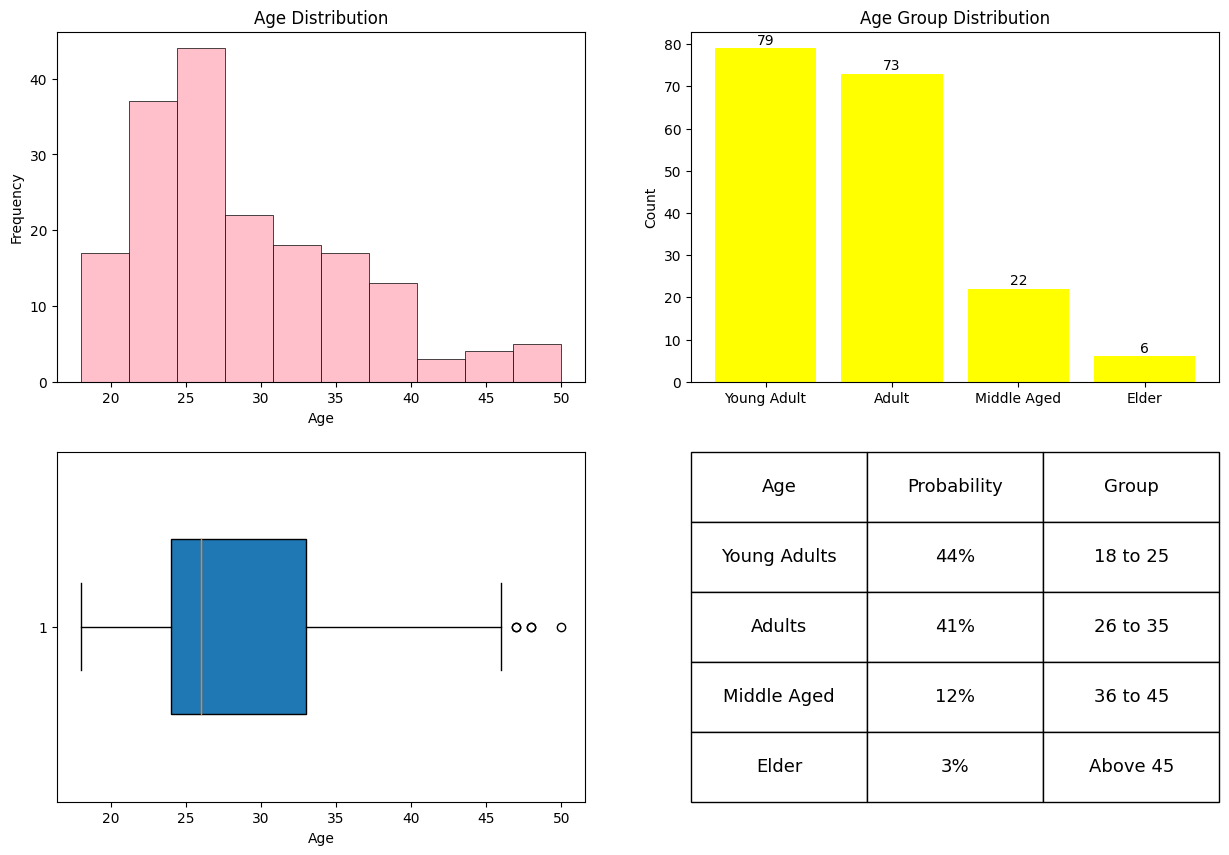

In [291]:
# age distribution
#setting the plot style

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2)

# age histogram
ax0 = fig.add_subplot(gs[0,0])

ax0.hist(df['Age'], color='pink', linewidth=0.5, edgecolor='black')
ax0.set_xlabel('Age')
ax0.set_ylabel('Frequency')
ax0.set_title('Age Distribution')

# age boxplot

ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Age'],vert = False,
                      widths = 0.5, patch_artist=True)
ax1.set_xlabel('Age')

# age range
ax2 = fig.add_subplot(gs[0,1])
age_range = df['Age_Range'].value_counts()
ax2.bar(x=age_range.index, height=age_range.values, color="yellow")
for i in age_range.index:
    ax2.text(i, age_range[i]+2,age_range[i],
             ha='center', va='center')
ax2.set_ylabel('Count')
ax2.set_xticklabels(age_range.index)
ax2.set_title('Age Group Distribution')

                                        #creating a table for group info

ax3 = fig.add_subplot(gs[1,1])
age_info = [['Young Adults','44%','18 to 25'],
            ['Adults','41%','26 to 35'],
            ['Middle Aged','12%','36 to 45'],
            ['Elder','3%','Above 45']]
table = ax3.table(cellText = age_info,
                  cellLoc='center',colLabels =['Age','Probability','Group'],
                  colLoc = 'center', bbox =[0, 0, 1, 1])

table.set_fontsize(13)
ax3.axis('off')
plt.show()

**Observations:**

*   Age of people using the treadmill is highly frequent in the range of 20 to 40.
*   Young Adults and Adults hold the highest usage probability in the entire dataframe.
*   Both Young Adults and Adults are very close in sharing equal distribution of treadmill usage.
*   A large population of slightly above 20 years and slightly below 35 years are the most active.
*   However we do observe 3 outliers in the 45 to 50 years range. These are very likely to be fitness enthutiasts.
*   Another observation is that as age increases the level of activity is also decreasing.


** Product Vs Income**

<ipython-input-292-e1030d6493e7>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(income.index, rotation = 9)


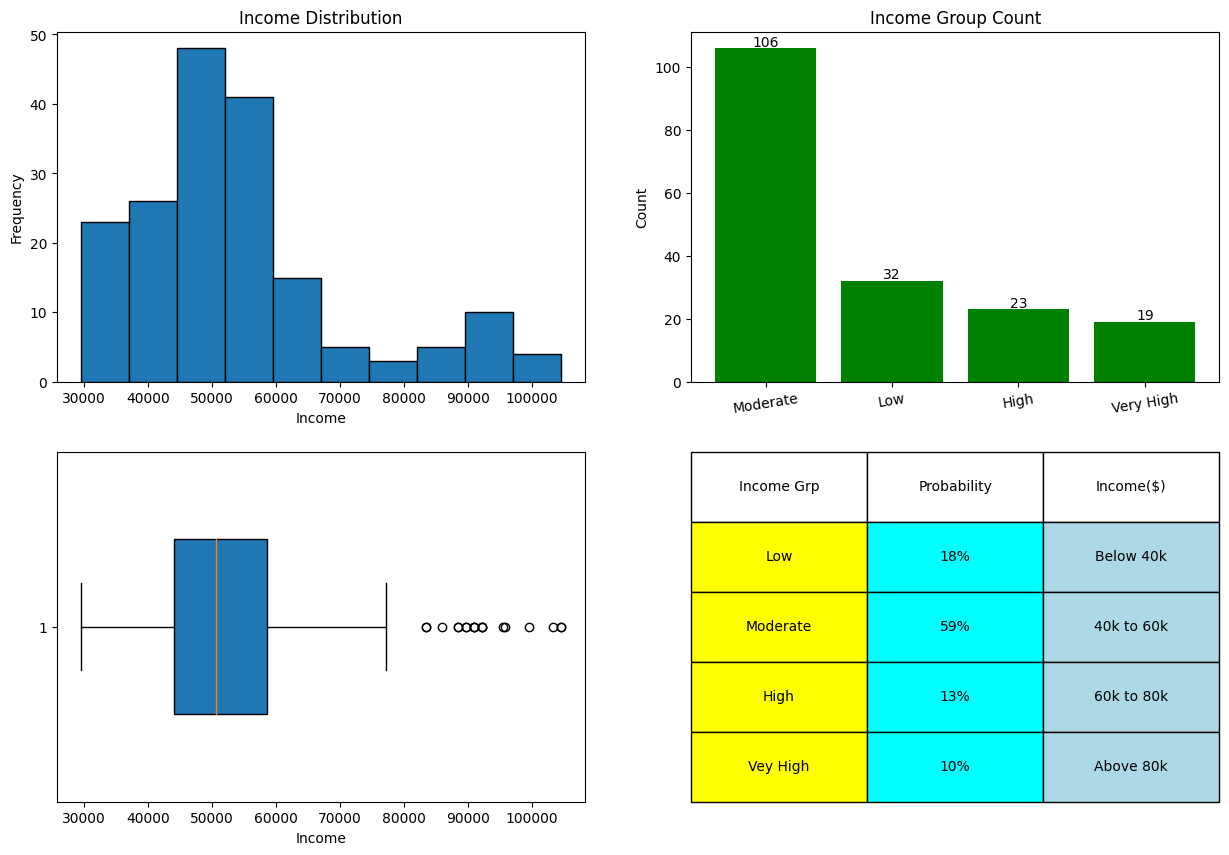

In [292]:
# income distribution

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2)

# barplot income
ax0 = fig.add_subplot(gs[0,0])
ax0.hist(df['Income'],edgecolor='black')
ax0.set_xlabel('Income')
ax0.set_ylabel('Frequency')
ax0.set_title('Income Distribution')

# boxplot income
ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Income'],vert = False,
                      patch_artist=True, widths = 0.5)
ax1.set_xlabel('Income')
# barplot income group
ax2 = fig.add_subplot(gs[0,1])
income = df['Income_Range'].value_counts()
ax2.bar(x=income.index,height = income.values,color = 'green')
for i in income.index:
    ax2.text(i,income[i]+2,income[i], ha = 'center',va = 'center')
ax2.set_ylabel('Count')
ax2.set_xticklabels(income.index, rotation = 9)
ax2.set_title('Income Group Count')

# table income ditribution
ax3 = fig.add_subplot(gs[1,1])
inc_info = [['Low','18%','Below 40k'],['Moderate','59%','40k to 60k'],['High','13%','60k to 80k'],
            ['Vey High','10%','Above 80k']]
color_2d = [["yellow",'cyan','lightblue'],["yellow",'cyan','lightblue'],["yellow",'cyan','lightblue'],
            ["yellow",'cyan','lightblue']]

table = ax3.table(cellText = inc_info, cellColours=color_2d, cellLoc='center',
                  colLabels =['Income Grp','Probability','Income($)'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
ax3.axis('off')

plt.show()

**Observations**:


*   The income range that is very highly populated is in the range of 30K USD to 60K USD.
*   A large concentration is between 40K to slightly below 60K USD. But there are a large number of definite outliers that are above the 80K USD range. These are mostly fitness enthutiasts and professional health athletes.
*   Moderate income group has the highest number of active activity and product purchase. The probability that this stays the same is also high.


In [293]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Range,Edu_Range,Income_Range,Activity_Range
0,KP281,18.0,Male,14.0,Single,3.0,4.0,29562.0,112.0,Young Adult,Secondary,Low,Active
1,KP281,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0,Young Adult,Secondary,Low,Moderate
2,KP281,19.0,Female,14.0,Partnered,4.0,3.0,30699.0,66.0,Young Adult,Secondary,Low,Moderate
3,KP281,19.0,Male,12.0,Single,3.0,3.0,32973.0,85.0,Young Adult,Primary,Low,Moderate
4,KP281,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0,Young Adult,Secondary,Low,Light


**Product Vs Miles**

<ipython-input-294-cffa6feca225>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(income.index, rotation = 9)


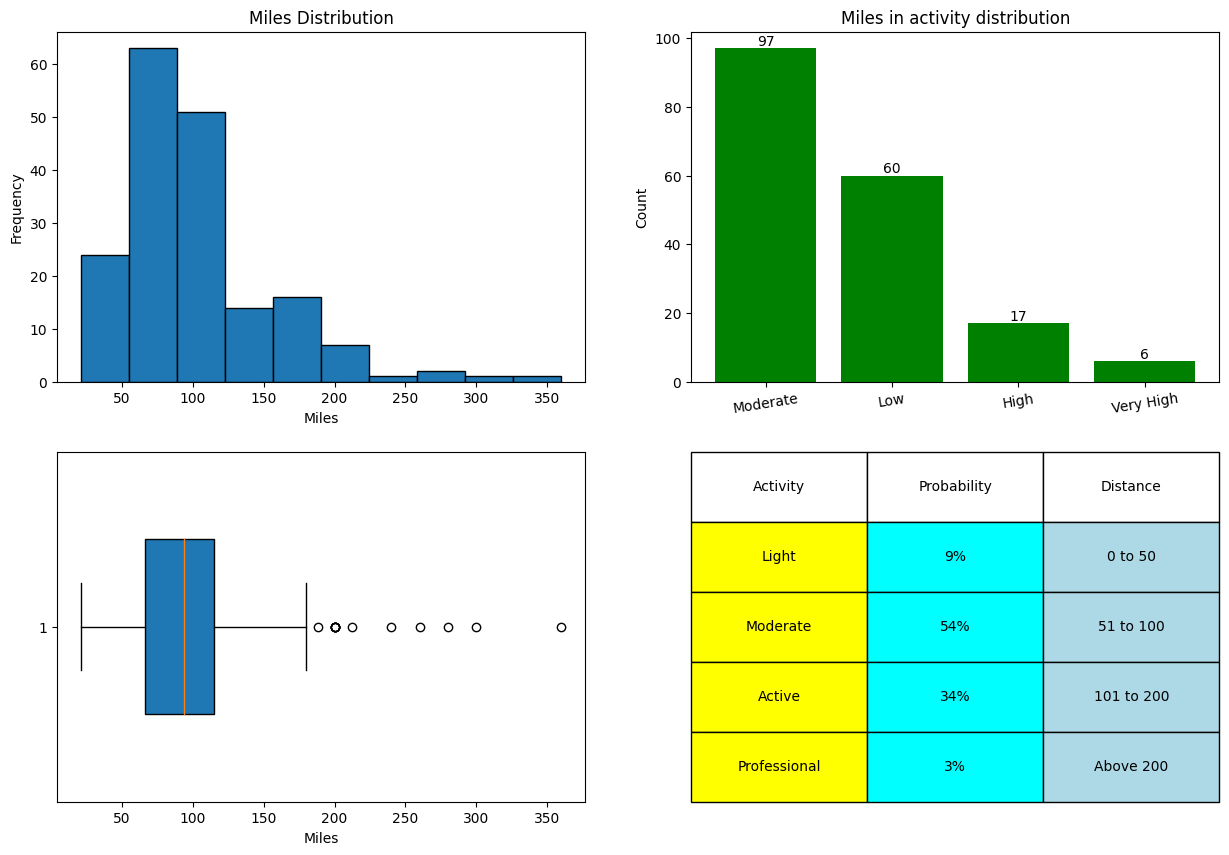

In [294]:
# miles distribution

fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(2,2)

# barplot income
ax0 = fig.add_subplot(gs[0,0])
ax0.hist(df['Miles'],edgecolor='black')
ax0.set_xlabel('Miles')
ax0.set_ylabel('Frequency')
ax0.set_title('Miles Distribution')

# boxplot income
ax1 = fig.add_subplot(gs[1,0])
boxplot = ax1.boxplot(x = df['Miles'],vert = False,
                      patch_artist=True, widths = 0.5)
ax1.set_xlabel('Miles')
# barplot income group
ax2 = fig.add_subplot(gs[0,1])
activity = df['Activity_Range'].value_counts()
ax2.bar(x=activity.index,height = activity.values,color = 'green')
for i in activity.index:
    ax2.text(i,activity[i]+2,activity[i], ha = 'center',va = 'center')
ax2.set_ylabel('Count')
ax2.set_xticklabels(income.index, rotation = 9)
ax2.set_title('Miles in activity distribution')

# table income ditribution
ax3 = fig.add_subplot(gs[1,1])
miles_info = [['Light','9%','0 to 50'],['Moderate','54%','51 to 100'],['Active','34%','101 to 200'],
            ['Professional','3%','Above 200']]
color_2d = [["yellow",'cyan','lightblue'],["yellow",'cyan','lightblue'],["yellow",'cyan','lightblue'],
            ["yellow",'cyan','lightblue']]

table = ax3.table(cellText = miles_info, cellColours=color_2d, cellLoc='center',
                  colLabels =['Activity','Probability','Distance'],
                  colLoc = 'center',bbox =[0, 0, 1, 1])
ax3.axis('off')

plt.show()

**Observations:**

*   The average miles covered is mostly in the range of greater than 50 and less than 150.
*   However there are many outliers in the above 150 plane. These outliers go upto 300+ Kms. These are mostly professional athletes and fitness enthutiasts.
*   It is also observed that the moderate activty distance is near to 90KMs which begs to answer that people prefer to use the treadmill moderately at about 2 to 3 times per week and prefer to cover long distances in that.
*   There is also a large trend of active users tha clock upto 200 kms as mileage in a week.



# Bivariate Analysis


**Product vs all segments:**

<ipython-input-295-905a68509187>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(df['Product'].unique())
<ipython-input-295-905a68509187>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(df['Product'].unique())
<ipython-input-295-905a68509187>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(df['Product'].unique())
<ipython-input-295-905a68509187>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(df['Product'].unique())


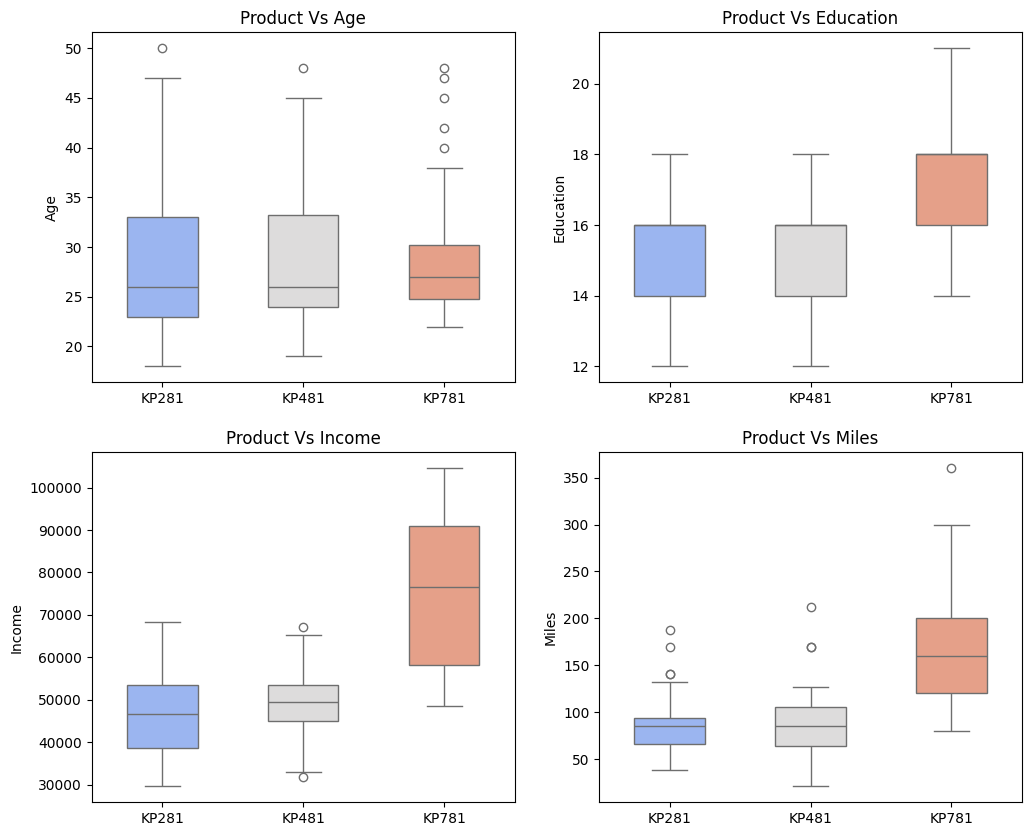

In [295]:
#setting the plot style
fig = plt.figure(figsize = (12,10))
gs = fig.add_gridspec(2,2)

for i,j,k in [(0,0,'Age'),(0,1,'Education'),(1,0,'Income'),(1,1,'Miles')]:
  _ax = fig.add_subplot(gs[i,j])
  sns.boxplot(data=df, x='Product', y=k,
              ax=_ax, width=0.5, hue="Product", palette="coolwarm")
  _ax.set_title(f'Product Vs {k}')
  _ax.set_xticklabels(df['Product'].unique())
  _ax.set_ylabel(f'{k}')
  _ax.set_xlabel('')
plt.show()

**Observations:**


*   The analysis presented above clearly indicates a strong preference for the treadmill model KP781 among customers who possess higher education, higher income levels, and intend to engage in running activities exceeding 150 miles per week.


In [296]:
# Common function to represent bivariate analysis over different segments
def bivar(vals, x_label, y_label, title):
  df_grp = df.groupby('Product')[f'{vals}'].value_counts(normalize = True).round(2).reset_index()
  fig, ax = plt.subplots(figsize=(8, 5))
  grouped = df_grp.groupby([f'{vals}', 'Product'])['proportion'].sum().unstack()
  grouped.plot(kind='bar', ax=ax)
  for i in ax.patches:
      ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(round(i.get_height(), 2)), ha='center', va='bottom')
  ax.set_xlabel(f'{x_label}')
  ax.set_ylabel(f'{y_label}')
  ax.set_title(f'{title}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

**Age range over proportion by product:**

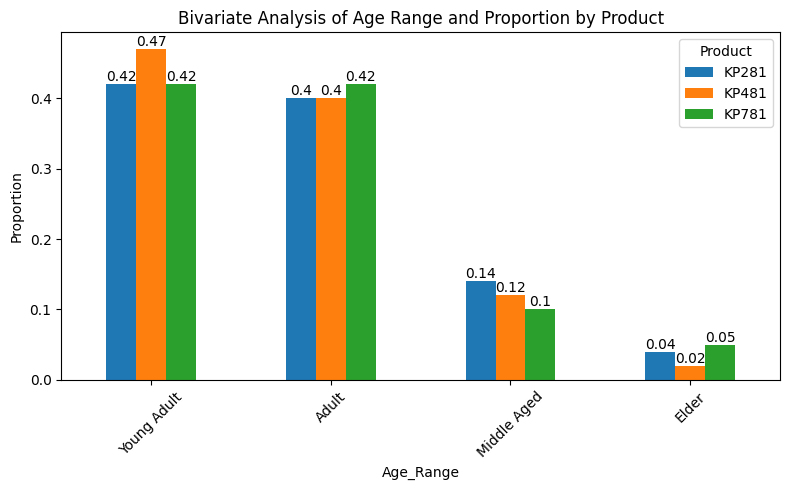

In [297]:
bivar('Age_Range', 'Age_Range', 'Proportion', 'Bivariate Analysis of Age Range and Proportion by Product')

**Observations:**

*   Young adults and Adults prefer to be more active and hence their proportion of KP281 and KP481 is more.
*   Middle age and Elder customers prefer more premium KP781 and medium level KP481.



**Education range over proportion by product:**

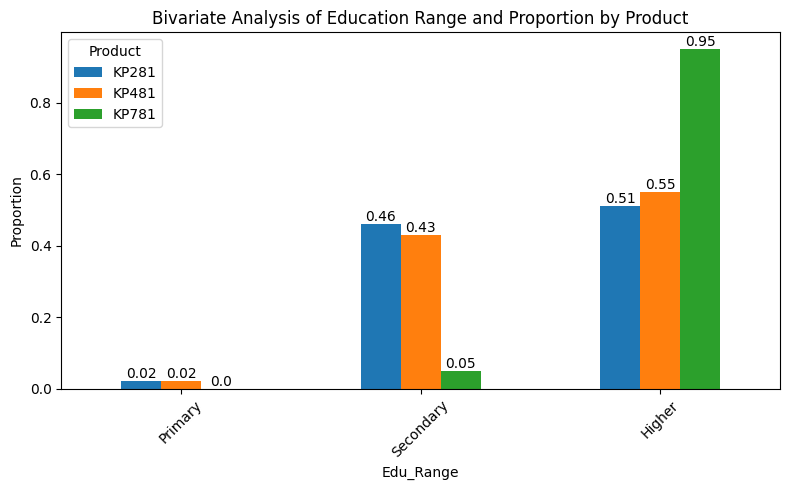

In [298]:
bivar('Edu_Range', 'Edu_Range', 'Proportion', 'Bivariate Analysis of Education Range and Proportion by Product')

**Observations:**


*   People with higher education prefer to have KP781 more than others. This is highly likely of their higher purchasing power.
*   People with secondary education prefer KP281 and KP481 more than KP781. This is because of the competitive price and their medium income range.



**Income range over proportion by product:**

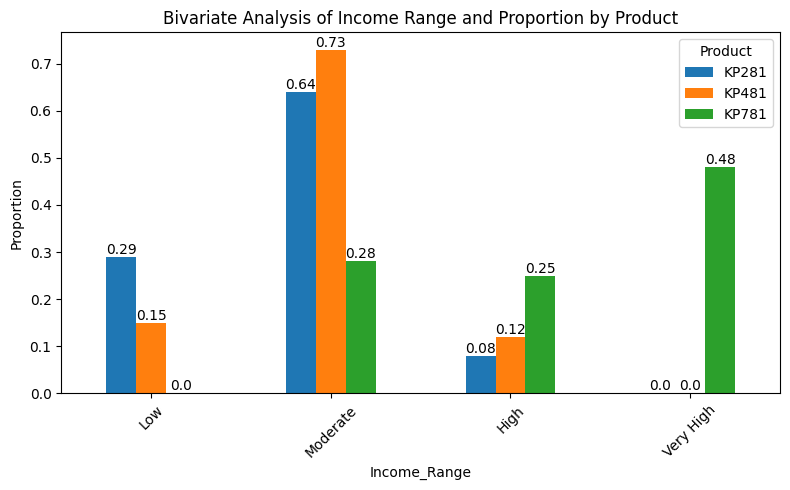

In [299]:
bivar('Income_Range', 'Income_Range', 'Proportion', 'Bivariate Analysis of Income Range and Proportion by Product')

**Observations:**


*   Moderate income customers prefer KP281 and KP481 more than KP781. This would be due to the competitive price tag and as well as their purchasing power.
*   Low income individuals prefer KP281 which is the lowest cost.
*   High and Very high income individuals prefer the KP781 treadmill. This can be due to the high utility of premium feel against higher cost and also the purchasing power of these individuals.




**Activity over proportion by Product:**

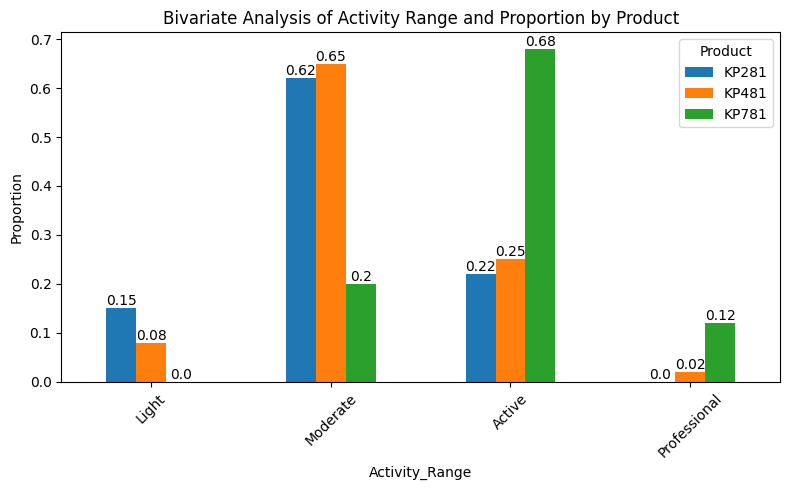

In [300]:
bivar('Activity_Range', 'Activity_Range', 'Proportion', 'Bivariate Analysis of Activity Range and Proportion by Product')

**Observations:**


*   Moderate activity personnel clock the highest mileage and they prefer the KP281 and KP481 treadmills.
*   Active and prefessional personnel prefer the KP281 over others.



**Gender over proportion of Product:**

<ipython-input-301-039ef629e610>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(df_grp.index)
<ipython-input-301-039ef629e610>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(df_grp.index)


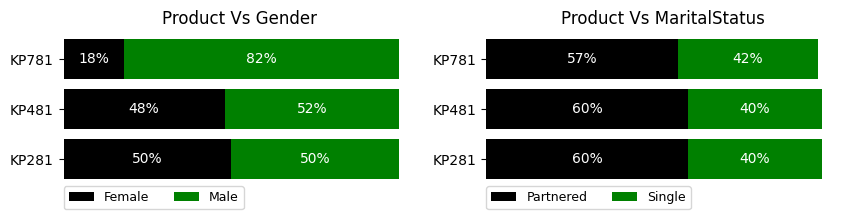

In [301]:
fig = plt.figure(figsize = (10,2))
gs = fig.add_gridspec(1,2)

for r,c,val in [(0,0,'Gender'),(0,1,'MaritalStatus')]:
    ax0 = fig.add_subplot(gs[r,c])
    df_grp = df.groupby('Product')[val].value_counts(normalize = True).round(2)
    df_grp.name = 'count'
    df_grp = df_grp.reset_index()
    df_grp = df_grp.pivot(columns = val,index = 'Product',values = 'count')
    temp = np.zeros(len(df_grp),dtype = float)
    color_map =  ["black", "green"]
    for i,j in zip(df_grp.columns,color_map):
        ax0.barh(df_grp.index,width = df_grp[i],left = temp, label = i,color = j)
        temp += df_grp[i].values
    temp = np.zeros(len(df_grp),dtype = float)

    for i in df_grp.columns:
        for j,k in enumerate(df_grp[i]):
            if k < 0.05:
                continue
            ax0.text(k/2 + temp[j],df_grp.index[j],f"{k:.0%}",va = 'center', ha='center',fontsize=10, color='white')
        temp += df_grp[i].values

    for s in ['top','left','right','bottom']:
        ax0.spines[s].set_visible(False)
    ax0.set_xticks([])
    ax0.set_yticklabels(df_grp.index)
    ax0.set_title(f'Product Vs {val}')
    ax0.legend(loc = (0,-0.15),ncol = 2,fontsize = 9)

plt.show()

**Observations**


*   Males prefer KP781 more than females.
*   Both KP481 and KP281 are almost equally distributed amongst males and females.
*   Married/Partnered individuals prefer to stay active and use treadmill more than single individuals. The distriution across treadmill types is same.



**Gender vs Product usage and Gender vs Fitness**

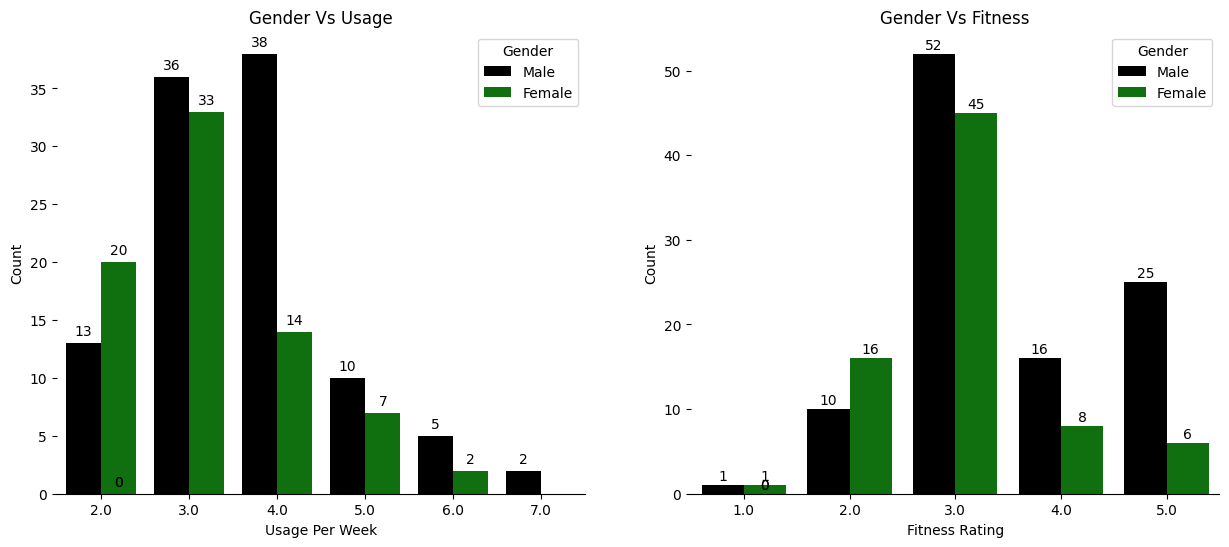

In [302]:
#setting the plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])

plot = sns.countplot(data = df, x = 'Usage', hue = 'Gender',order = sorted(df['Usage'].unique()),
              ax = ax1,palette = ["black","green"], zorder = 2)
for i in plot.patches:
    ax1.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',ha = 'center',va = 'center')
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)
ax1.set_xlabel('Usage Per Week')
ax1.set_ylabel('Count')
ax1.set_title('Gender Vs Usage')


ax2 = fig.add_subplot(gs[0,1])
plot = sns.countplot(data = df, x = 'Fitness', hue = 'Gender',order = sorted(df['Fitness'].unique()),
              ax = ax2,palette = ["black","green"], zorder = 2)
for i in plot.patches:
    ax2.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}', ha = 'center',va = 'center')
for s in ['top','left','right']:
    ax2.spines[s].set_visible(False)
ax2.set_xlabel('Fitness Rating')
ax2.set_ylabel('Count')
ax2.set_title('Gender Vs Fitness')

plt.show()

**Observations:**


*   Females prefer to use treadmill 2 to 3 times a week, about 70% of them.
*   Males prefer to use the treadmill 3 to 4 times a week, about 70% of them.
*   Almost 80% female customers rate themselves at 2 to 3 rating.
*   Almost 90% male customers rate themselves at 3 to 5 rating.


# Correlation

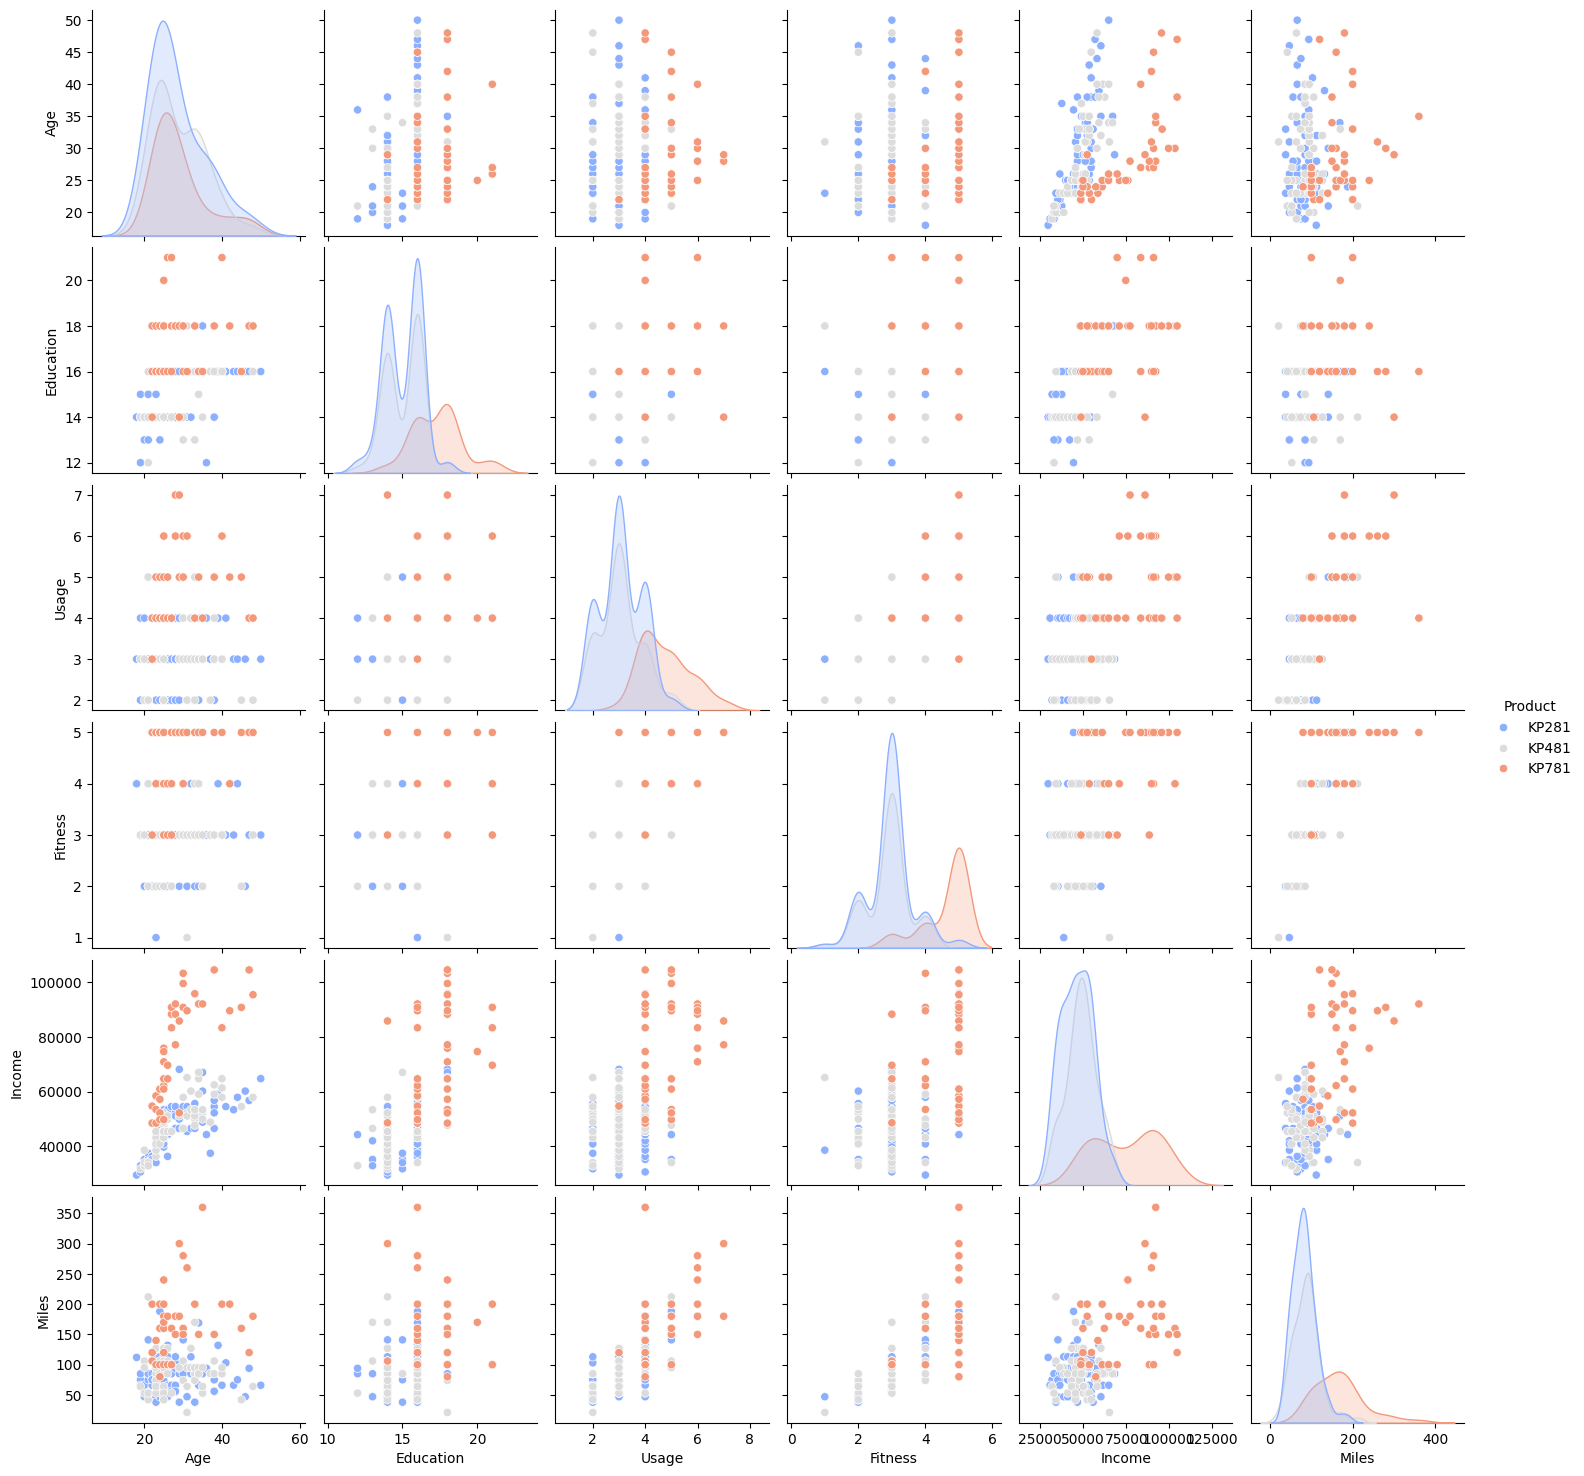

In [303]:
import copy
df_copy = copy.deepcopy(df)
sns.pairplot(df_copy, hue ='Product', palette= 'coolwarm')
plt.show()

In [306]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Range,Edu_Range,Income_Range,Activity_Range
0,KP281,18.0,Male,14.0,Single,3.0,4.0,29562.0,112.0,Young Adult,Secondary,Low,Active
1,KP281,19.0,Male,15.0,Single,2.0,3.0,31836.0,75.0,Young Adult,Secondary,Low,Moderate
2,KP281,19.0,Female,14.0,Partnered,4.0,3.0,30699.0,66.0,Young Adult,Secondary,Low,Moderate
3,KP281,19.0,Male,12.0,Single,3.0,3.0,32973.0,85.0,Young Adult,Primary,Low,Moderate
4,KP281,20.0,Male,13.0,Partnered,4.0,2.0,35247.0,47.0,Young Adult,Secondary,Low,Light


**Observations:**
From the pair plot we can see  and heatmap also suggests a strong correlation betwwen them



Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage

*   Age and Income are positively correlated.
*   Eductaion and Income are positively correlated.
*   Eductation and Fitness rating and Education and Usage of the treadmill are positively correlated.
*   Usage is positively correlated with Miles.



# Probability computation and analysis

In [332]:
def fn_prob(fil, cols, xlabel, ylabel, title):
  data = pd.crosstab(index=df['Product'], columns=df[f'{fil}'], margins = True, normalize=True).round(2)
  print(data)
  # Plot
  d_data = data.drop(index='All', axis=0).reset_index()
  fig, ax = plt.subplots(figsize=(8, 3))
  d_data.set_index('Product')[cols].plot(kind='bar', stacked=True, ax=ax)

  # Add labels and title
  ax.set_xlabel(f'{xlabel}')
  ax.set_ylabel(f'{ylabel}')
  ax.set_title(f'{title}')
  plt.xticks(rotation=45)

**Probability of Aerofit Treadmill purchase against Gender:**

Gender   Female  Male   All
Product                    
KP281      0.22  0.22  0.44
KP481      0.16  0.17  0.33
KP781      0.04  0.18  0.22
All        0.42  0.58  1.00


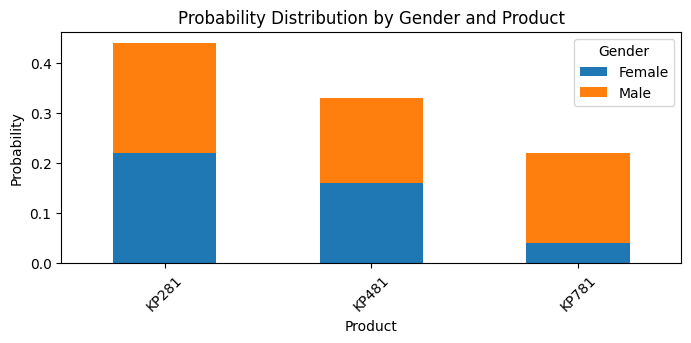

In [333]:
fn_prob('Gender', ['Female', 'Male'], 'Product', 'Probability', 'Probability Distribution by Gender and Product')

**Observation**:


*   The probability of gender=Female purchasing a treadmill is 42% with conditional events at 22% for KP281, 16% for KP481 and 4% for KP781.
*   The probability of gender=Male purchasing a treadmill is 58% with conditional events at 22% for KP281, 17% for KP481 and 18% for KP781.

**Probability of Aerofit Treadmill purchase against Age Range:**

Age_Range  Young Adult  Adult  Middle Aged  Elder   All
Product                                                
KP281             0.19   0.18         0.06   0.02  0.44
KP481             0.16   0.13         0.04   0.01  0.33
KP781             0.09   0.09         0.02   0.01  0.22
All               0.44   0.41         0.12   0.03  1.00


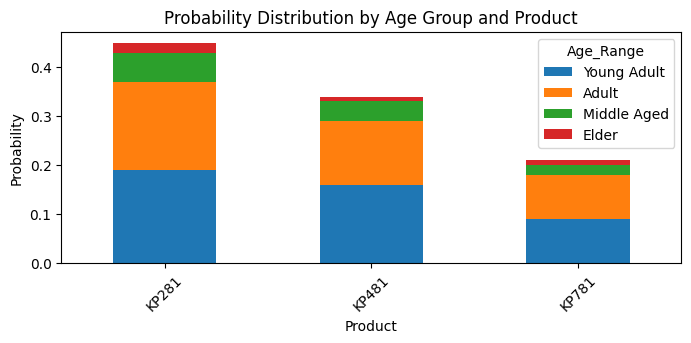

In [334]:
fn_prob('Age_Range', ['Young Adult', 'Adult', 'Middle Aged', 'Elder'], 'Product', 'Probability', 'Probability Distribution by Age Group and Product')

**Observation:**

*   The probability of Young Adult purchasing a treadmill is 44% with conditional events at 19% for KP281, 16% for KP481 and 9% for KP781.
*   The probability of Adult purchasing a treadmill is 41% with conditional events at 18% for KP281, 13% for KP481 and 9% for KP781.
*   The probability of Middle Aged Individual purchasing a treadmill is 12% with conditional events at 6% for KP281, 4% for KP481 and 2% for KP781.
*   The probability of an Elder purchasing a treadmill is 3% with conditional events at 1% for KP281, 1% for KP481 and 1% for KP781.


**Probability of Aerofit Treadmill purchase against Education:**

Edu_Range  Primary  Secondary  Higher   All
Product                                    
KP281         0.01       0.21    0.23  0.44
KP481         0.01       0.14    0.18  0.33
KP781         0.00       0.01    0.21  0.22
All           0.02       0.36    0.62  1.00


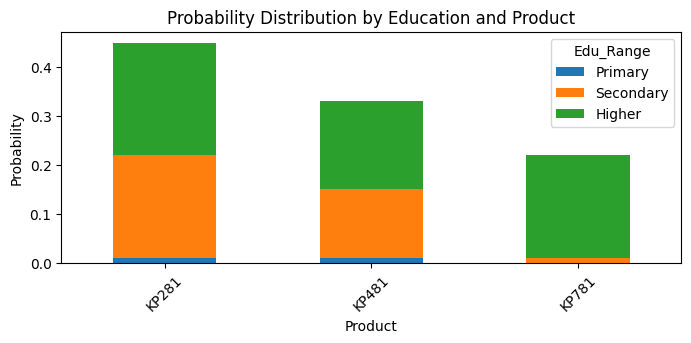

In [335]:
fn_prob('Edu_Range', ['Primary', 'Secondary', 'Higher'], 'Product', 'Probability', 'Probability Distribution by Education and Product')

**Observation:**

*   The probability of Primary education customer purchasing a treadmill is 2% with conditional events at 1% for KP281, 1% for KP481 and 0% for KP781.
*   The probability of Secondary education customer purchasing a treadmill is 36% with conditional events at 21% for KP281, 14% for KP481 and 1% for KP781.
*   The probability of Higher education customer purchasing a treadmill is 62% with conditional events at 23% for KP281, 18% for KP481 and 21% for KP781.


The reason that a higher educated customer is highly likely to purchase a treadmill is because they have higher spending power. Primary education customers are dependents on parents.


Income_Range   Low  Moderate  High  Very High   All
Product                                            
KP281         0.13      0.28  0.03       0.00  0.44
KP481         0.05      0.24  0.04       0.00  0.33
KP781         0.00      0.06  0.06       0.11  0.22
All           0.18      0.59  0.13       0.11  1.00


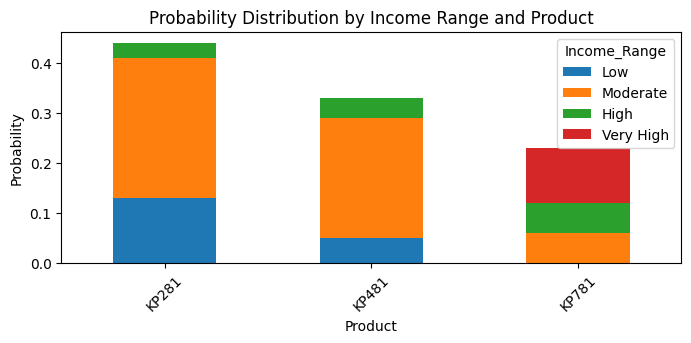

In [336]:
fn_prob('Income_Range', ['Low', 'Moderate', 'High', 'Very High'], 'Product', 'Probability', 'Probability Distribution by Income Range and Product')

**Observation:**

*   The probability of Low income customer purchasing a treadmill is 18% with conditional events at 13% for KP281, 5% for KP481 and 0% for KP781.
*   The probability of Moderate income customer purchasing a treadmill is 59% with conditional events at 28% for KP281, 24% for KP481 and 6% for KP781.
*   The probability of High Income customer purchasing a treadmill is 13% with conditional events at 3% for KP281, 4% for KP481 and 6% for KP781.
*   The probability of Very High Income customer purchasing a treadmill is 11% with conditional events at 0% for KP281, 0% for KP481 and 11% for KP781.


The reason that a Very High Income customer is highly likely to purchase a costlier treadmill is because they have higher spending power. Also, Moderate Income individuals are equally spread on purchasing a KP281 or a KP481 treadmill. But they will very rarely buy a KP781.


MaritalStatus  Partnered  Single   All
Product                               
KP281               0.27    0.18  0.44
KP481               0.20    0.13  0.33
KP781               0.13    0.09  0.22
All                 0.59    0.41  1.00


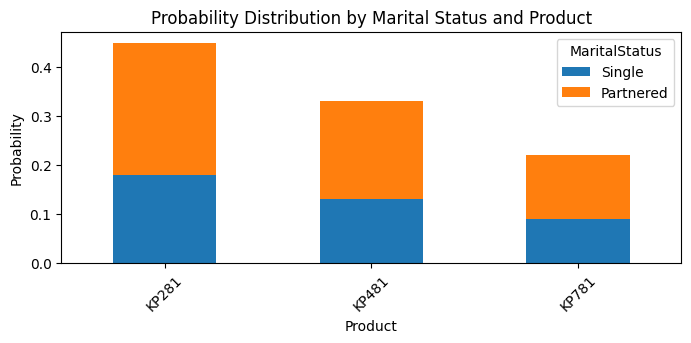

In [337]:
fn_prob('MaritalStatus', ['Single', 'Partnered'], 'Product', 'Probability', 'Probability Distribution by Marital Status and Product')

**Observation:**

*   The probability of a Single individual purchasing a treadmill is 41% with conditional events at 18% for KP281, 13% for KP481 and 9% for KP781.
*   The probability of Partnered/Married customer purchasing a treadmill is 59% with conditional events at 27% for KP281, 20% for KP481 and 13% for KP781.

The reason that a Partnered/Married customer is highly likely to purchase a costlier treadmill is because they have higher living expectations. However the buying capacity of both categories is very likely near to each other.

Activity_Range  Light  Moderate  Active  Professional   All
Product                                                    
KP281            0.07      0.28    0.10          0.00  0.44
KP481            0.03      0.22    0.08          0.01  0.33
KP781            0.00      0.04    0.15          0.03  0.22
All              0.09      0.54    0.33          0.03  1.00


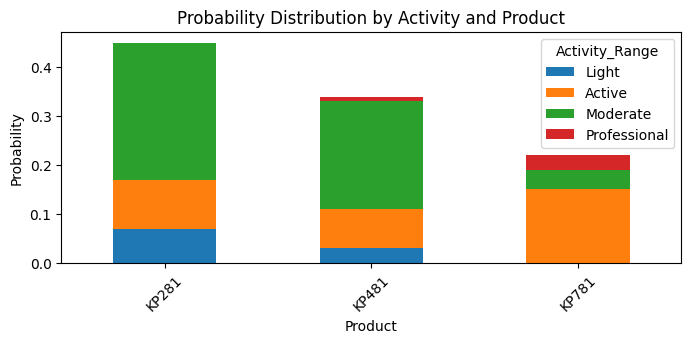

In [338]:
fn_prob('Activity_Range', ['Light', 'Active', 'Moderate', 'Professional'], 'Product', 'Probability', 'Probability Distribution by Activity and Product')

**Observation:**

*   The probability of Light Activity customer purchasing a treadmill is 9% with conditional events at 7% for KP281, 3% for KP481 and 0% for KP781.
*   The probability of Moderate Activity customer purchasing a treadmill is 54% with conditional events at 28% for KP281, 22% for KP481 and 4% for KP781.
*   The probability of Active Activity customer purchasing a treadmill is 33% with conditional events at 10% for KP281, 8% for KP481 and 15% for KP781.
*   The probability of Professional Activity customer purchasing a treadmill is 3% with conditional events at 0% for KP281, 1% for KP481 and 3% for KP781.


The reason tht we observe Moderate activity individuals in KP281 and KP481 more is because they prefer to be more active and both the treadmills are within their buying range. Professional are mostly in the KP781 level as it will have higher functionality and utility.

Fitness   1.0   2.0   3.0   4.0   5.0   All
Product                                    
KP281    0.01  0.08  0.30  0.05  0.01  0.44
KP481    0.01  0.07  0.22  0.04  0.00  0.33
KP781    0.00  0.00  0.02  0.04  0.16  0.22
All      0.01  0.14  0.54  0.13  0.17  1.00


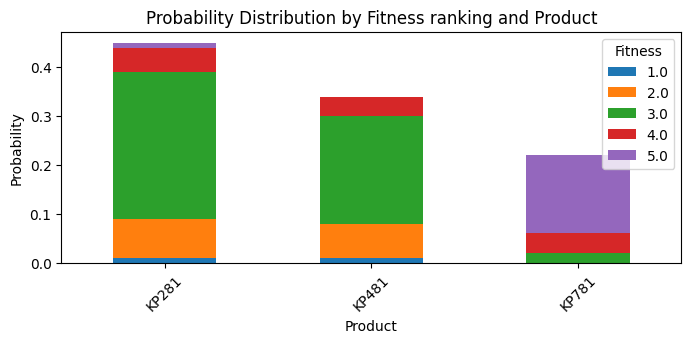

In [341]:
fn_prob('Fitness', [1.0, 2.0, 3.0, 4.0, 5.0], 'Product', 'Probability', 'Probability Distribution by Fitness ranking and Product')

**Observation:**

It is observed that the people who have rated themselves as 3.0 are more active and more keen on buying KP281 and KP481.

The people who have ranked themselves as 5.0 are more keen on using KP781 as their treadmill.

# Profiling

*KP281*


*   It is the top-selling treadmill model.
*   Market share of 44.44% of total sales.
*   Income range is between 30K USD and 60K USD. The average income of KP281 buyers is 46.4K USD.
*   Customers use KP281 at an average of 3 times a week.
*   KP281 customers are moderately healthy and rate themselves as of 3 out of 5 in a fitness scale. The median/mean fitness rating for KP281 users remains at 3
*   Both genders equally favor the KP281 model as their preferred treadmill choice.
*   The age range of KP281 buyers falls approximately between 22 to 33 years.
*   The education level of KP281 buyers is 13 years and above.
*   The average mileage on KP281 treadmill, is approximately a distance of 75 to 80 miles.
*   Single female customers slightly outnumber single male customers in KP281 purchases, while partnered male customers bought KP281 slightly more than single male customers.


*KP481*
*   It is the second highest-selling treadmill model.
*   Market share of 33.33% of total sales.
*   Income range is between 40K USD and 80K USD. The average income of KP481 buyers is 49K USD.
*   Customers use KP481 at an average of 2 to 3 times a week.
*   KP481 customers are moderately healthy and rate themselves as of 3 out of 5 in a fitness scale. The median/mean fitness rating for KP481 users remains at 3
*   The age range of KP281 buyers falls approximately between 18 to 35 years. And outliers at 35 to 50 years.
*   The education level of KP481 buyers is 13 years and above.
*   The average mileage on KP481 treadmill, is approximately a distance of 50 to 200 miles.
*   Male customers slightly outnumber female customers in KP481 purchases, while partnered male customers bought KP281 slightly more than single male customers.

*KP781*
*   Less sold because of its high cost.
*   Lowest in market share.
*   Income range is 80K USD and above. The average income of KP781 buyers is 75K USD.
*   Customers use KP781 at an average of 4 to 7 times a week.
*   KP781 customers are moderately as well as professional in fitness and rate themselves as of 4/5 out of 5 in a fitness scale.
*   The age range of KP781 buyers falls approximately between 25 to 35 years. And outliers at 35 to 50 years.
*   The education level of KP781 buyers is 20 and above.
*   The average mileage on KP781 treadmill, is approximately a distance of 100 miles and above.
*   Male customers are the highest purchasers of this treadmill.

# Recommendations


*   KP781 is an establised premium treadmill but the usage of this treadmill is mostly done by the Male gender. Ther should be special campaigns to attract Female customers with promotions on health and attractive offers.
*   Promote both KP481 and KP281 as mid segment user treadmill and bring out offers to target 35K to 50K income customers. Retain existing customers using new health plans and food recipies with usage and mileage gathered.
*   Create integrations with health apps like YesFit and provide achievements and goals to customers for a healthy lifestyle. Integrate awards and recognition banners in the form of badges once a target is completed.


